In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize
import random

In [21]:
#Llamamos los datos que ajustaremos
np.load('fit_exercise.npy')       
(x1,y1,error) = np.load('fit_exercise.npy') 

dt=np.load('fit_exercise.npy')


In [83]:
#Queremos que nuestros datos se ajusten a un modelo de línea recta de la forma y=b*x+a, donde a y b son los parámetros
def modelo(a, b, x):
    ym= b*x+a
    return ym

In [96]:
#Definimos un likelihood con una función de probabilidad de muestra, en este caso la distribución gaussiana. V es la varianza de los datos
def likelihood(x, y, v, a, b, modelo):
        ymod=modelo(a,b,x)
        return  (np.sqrt(2*math.pi*v**2))*np.exp(-np.sum((y-ymod)**2)/(2*v))
    
#La varianza está dada por 
v=np.var(y1)

In [106]:
#Ahora procedemos con el algoritmo

def MCM2(likelihood, a_0, b_0, x1, y1, N):

    N=10000   #camtidad de iteraciones
    av=np.zeros(N)   #vectores para guardar los datos
    bv=np.zeros(N)
#Los valores iniciales para los parámetros estarán dados por a_0 y b_0
    av[0]=a_0
    bv[0]=b_0
    #cv[0]=p3
    for k in range(N-1):
        ak=np.random.normal(av[k], 0.2)
        bk= np.random.normal(bv[k], 0.2)
        #ck= np.random.normal(cv[k], 0.2)
        posteriorold=likelihood(x1, y1, v, av[k], bv[k], modelo)
        posteriornew=likelihood(x1, y1, v, ak, bk, modelo)
        if posteriornew>posteriorold:
            av[k+1]=ak
            bv[k+1]=bk
            #cv[k+1]=ck
        elif posteriornew<=posteriorold:
            ran = random.uniform(0, 1)
            ratio=posteriornew/posteriorold
            if ratio > ran:
                av[k+1]=ak
                bv[k+1]=bk
                #cv[k+1]=ck
            elif ratio <= ran:
                av[k+1]=np.copy(av[k])
                bv[k+1]=np.copy(bv[k])
                #cv[k+1]=np.copy(cv[k])
    return plt.plot(av, bv, 'o'), print('y = ', av.mean(), '+ (', bv.mean(),')x')

y =  4.7710723544316656 + ( -1.0154556119977323 )x


([<matplotlib.lines.Line2D at 0x25259a0efa0>], None)

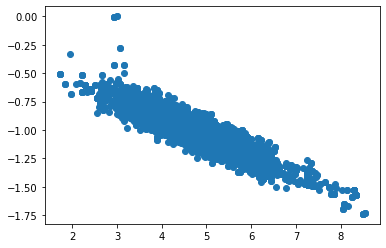

In [107]:
MCM2(likelihood, 3, 0, x1, y1, N)